#### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [1]:
from pycaret.datasets import get_data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

### PREPARANDO O DATASET

In [2]:
df = get_data('automobile')
df['num-of-doors'] = df['num-of-doors'].fillna(method='ffill')
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())
df_object = df.select_dtypes(include='object')
remover = df_object.columns[df_object.nunique() > 8]
df = df.drop(remover, axis=1)
df.info()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  202 non-null    float64
 2   fuel-type          202 non-null    object 
 3   aspiration         202 non-null    object 
 4   num-of-doors       202 non-null    object 
 5   body-style         202 non-null    object 
 6   drive-wheels       202 non-null    object 
 7   engine-location    202 non-null    object 
 8   wheel-base         202 non-null    float64
 9   length             202 non-null    float64
 10  width              202 non-null    float64
 11  height             202 non-null    float64
 12  curb-weight        202 non-null    int64  
 13  engine-type        202 non-null    object 
 14  num-of-cylinders   202 non-null    object 
 15  engine-size        202 non-null    int64  
 16  fuel-system        202 non

### AVALIAÇÃO DESCRITIVA DOS DADOS

In [3]:
pp.ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Criamos nosso normalizados(Deixará os dados numéricos em uma mesma escala) 
### Criamos nosso numerador(Transformará os dados categóricos em numéricos)

In [4]:
normalizador = MinMaxScaler()
numerador = OneHotEncoder(sparse=False)

### PRÉ-PROCESSAMENTO DOS DADOS E SEPARAÇÃO EM TREINO E TESTE

In [5]:
X_norm = normalizador.fit_transform(df.drop('price', axis=1).select_dtypes(exclude='object'))
X_num = numerador.fit_transform(df.drop('price', axis=1).select_dtypes(include='object'))
X = np.append(X_norm,X_num,axis=1)
X = normalizador.fit_transform(X)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(151, 48)
(51, 48)
(151,)
(51,)


### SELEÇÃO E AVALIAÇÃO DOS MODELOS (ALGUNS MODELOS DÃO UNDERFITTING)


 RandomForestRegressor(max_depth=10, n_estimators=500) 

### Teste ###
RSME =  2444.31
R2 SCORE =  93.35


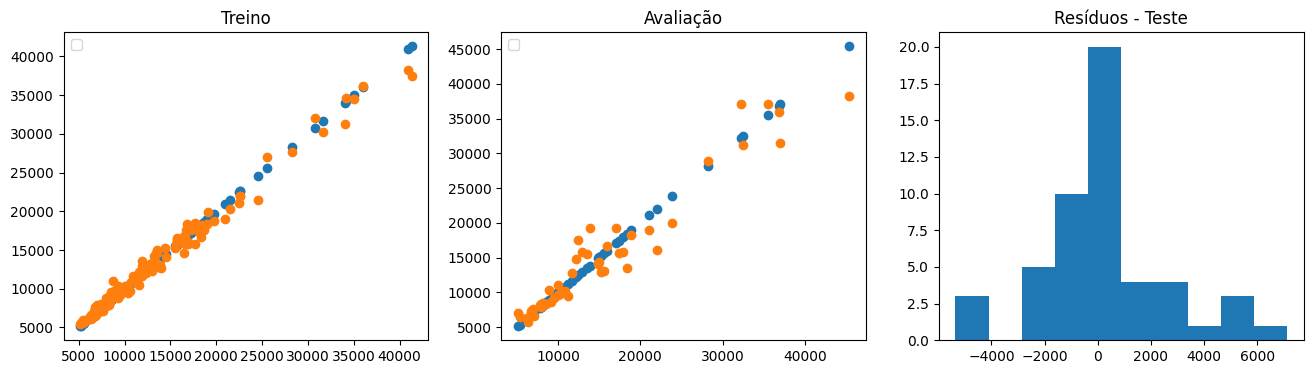


 ExtraTreesRegressor(max_depth=10, n_estimators=500) 

### Teste ###
RSME =  2450.81
R2 SCORE =  93.32


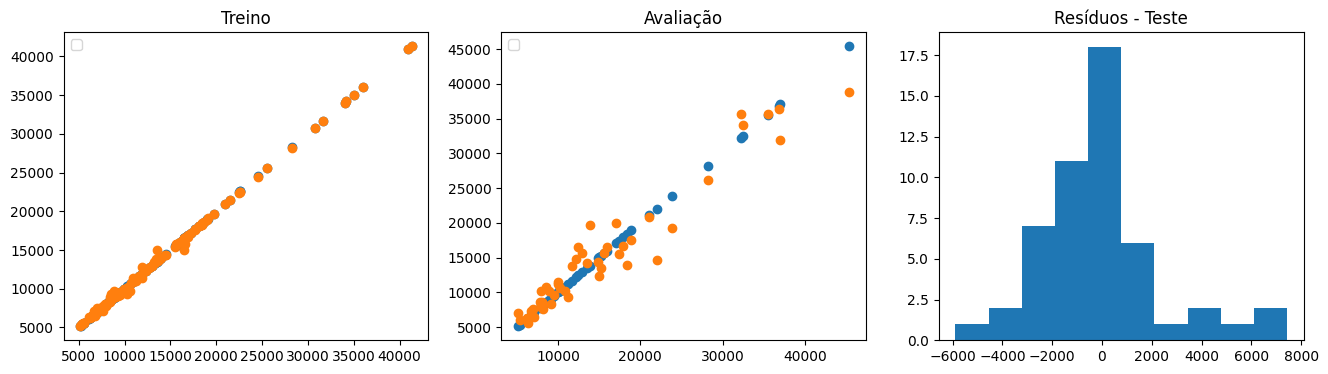


 DecisionTreeRegressor(max_depth=10) 

### Teste ###
RSME =  3089.0
R2 SCORE =  89.39


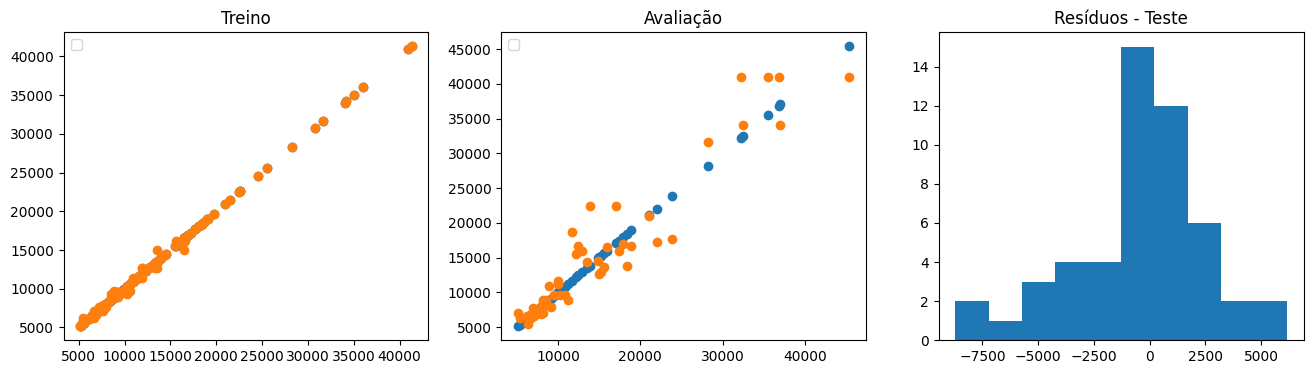


 SVR(kernel='poly') 

### Teste ###
RSME =  10651.42
R2 SCORE =  -26.2


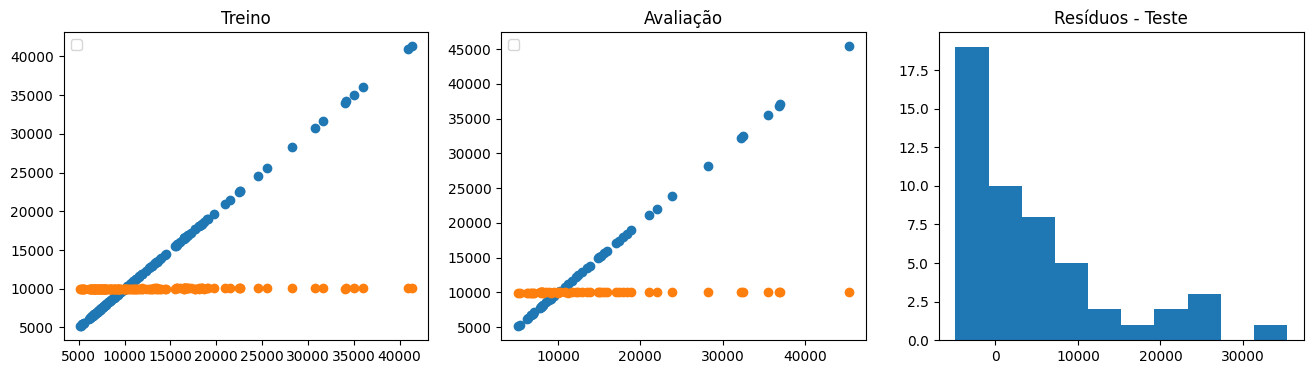


 SVR(kernel='sigmoid') 

### Teste ###
RSME =  10676.05
R2 SCORE =  -26.79


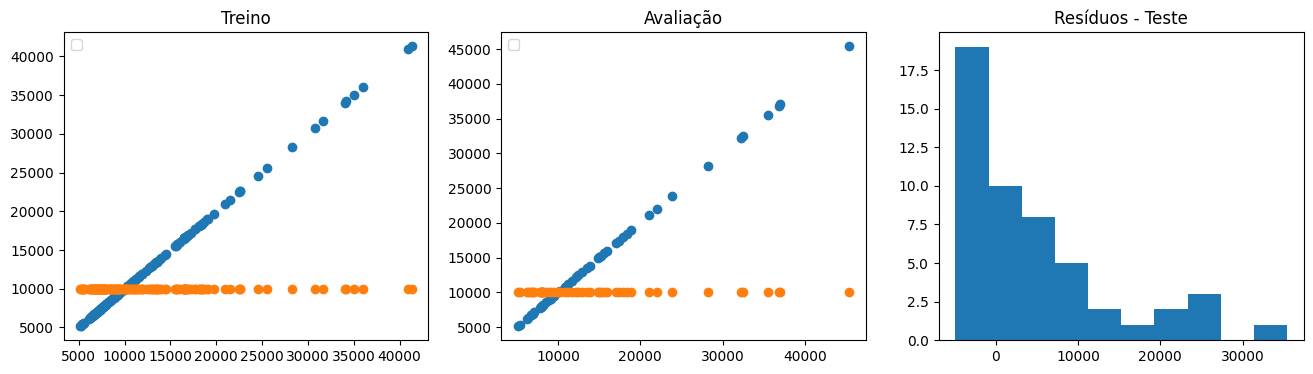


 SVR(kernel='linear') 

### Teste ###
RSME =  10597.34
R2 SCORE =  -24.92


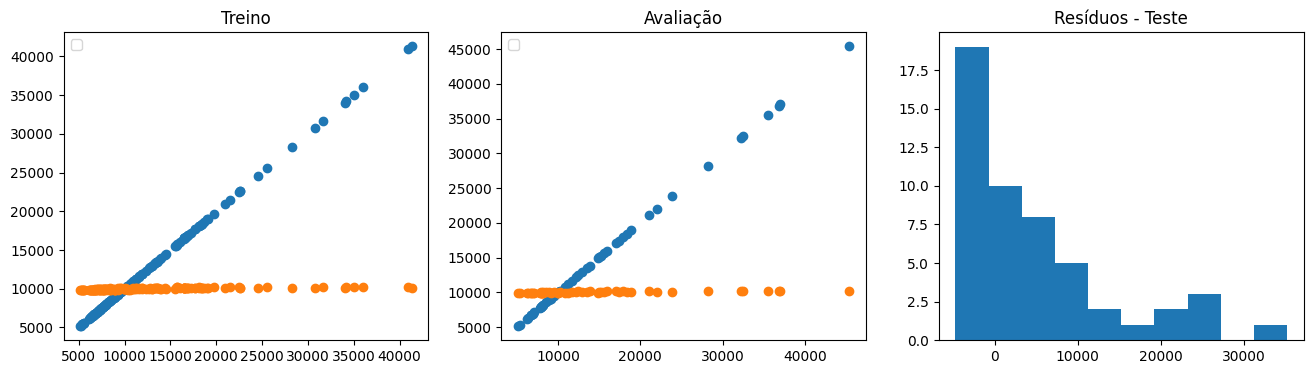


 SVR() 

### Teste ###
RSME =  10673.83
R2 SCORE =  -26.73


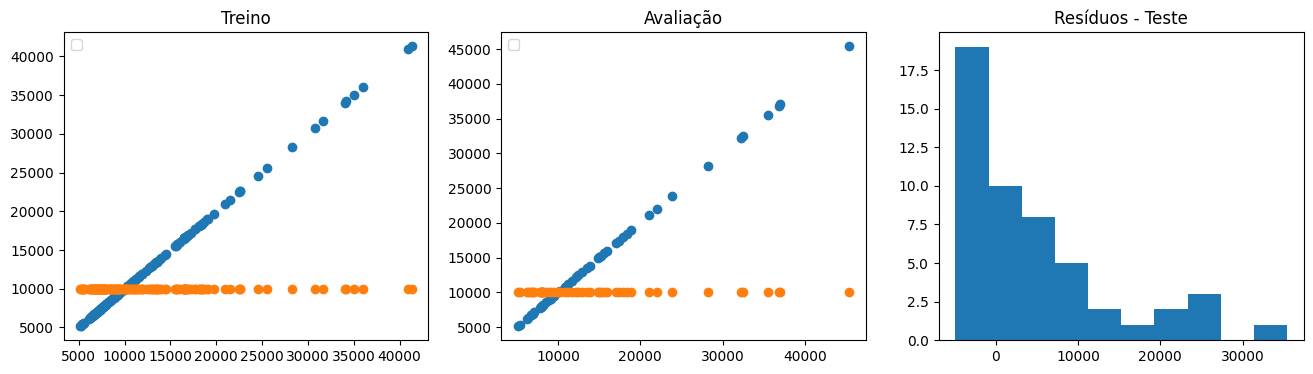


 KNeighborsRegressor() 

### Teste ###
RSME =  5660.75
R2 SCORE =  64.35


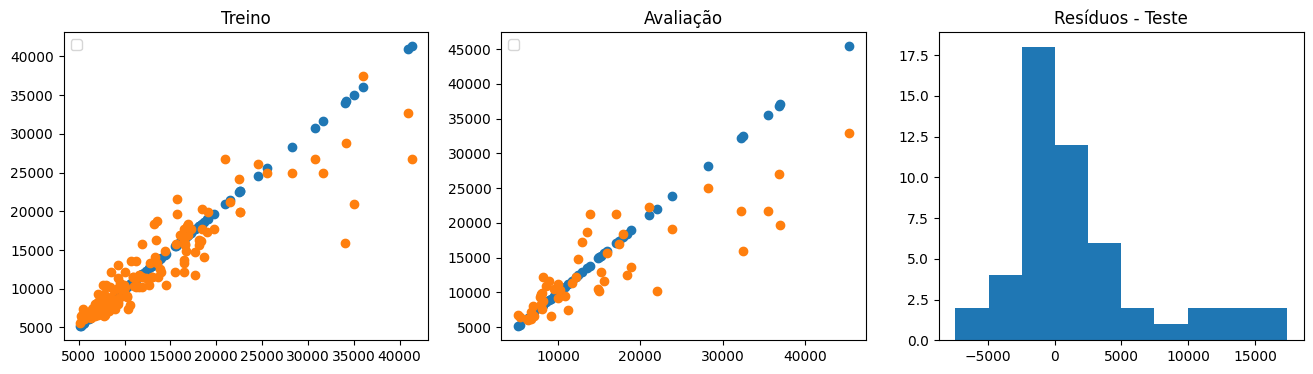


 LinearRegression() 

### Teste ###
RSME =  3070.69
R2 SCORE =  89.51


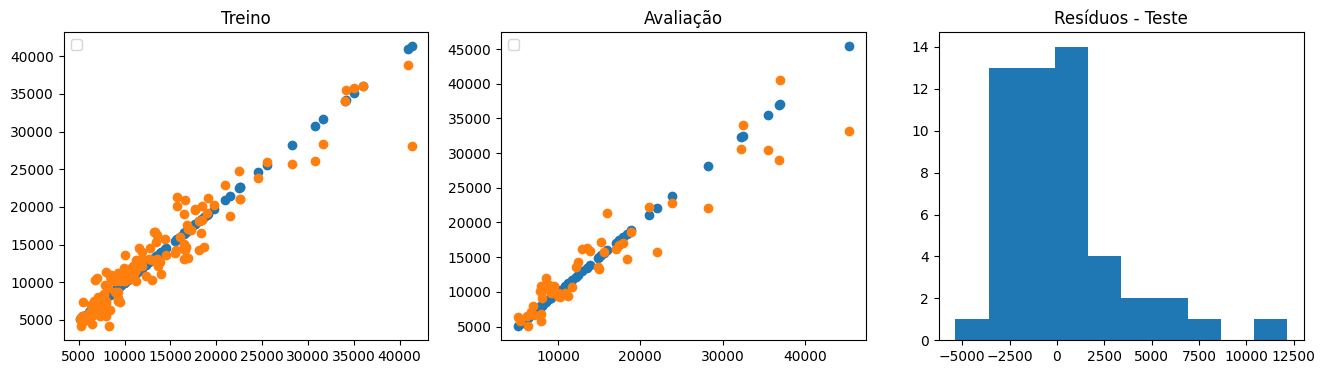


 MLPRegressor() 

### Teste ###
RSME =  17609.97
R2 SCORE =  -244.96


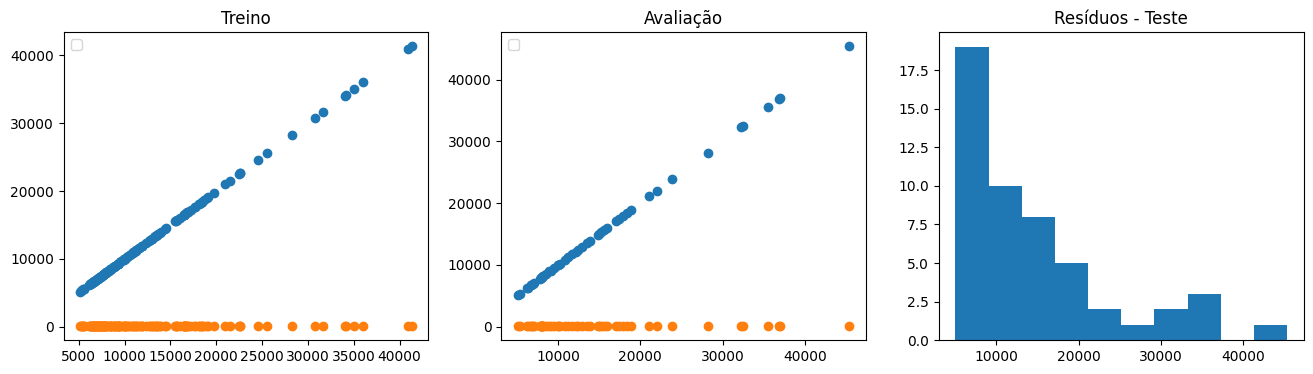


 MLPRegressor(solver='lbfgs') 

### Teste ###
RSME =  2993.65
R2 SCORE =  90.03


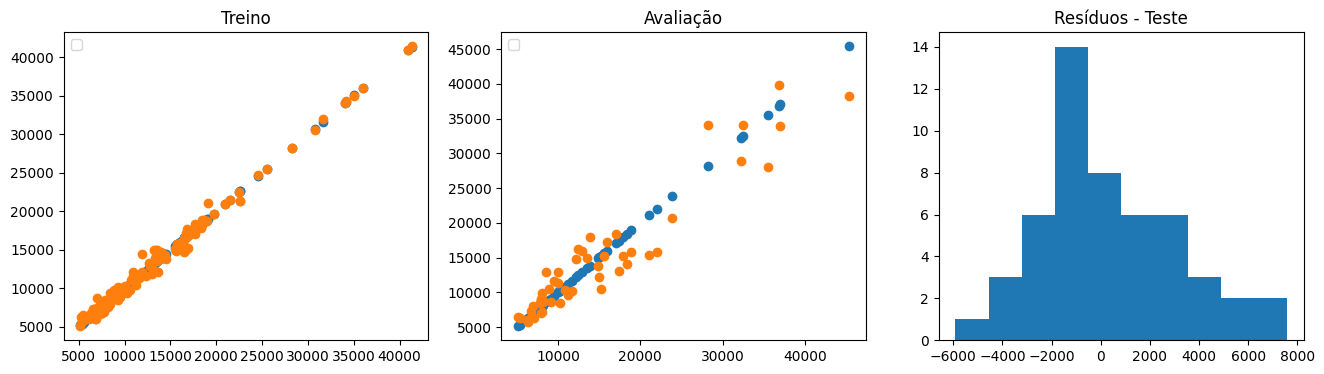


 MLPRegressor(solver='sgd') 

### Teste ###
RSME =  71141.12
R2 SCORE =  -5529.8


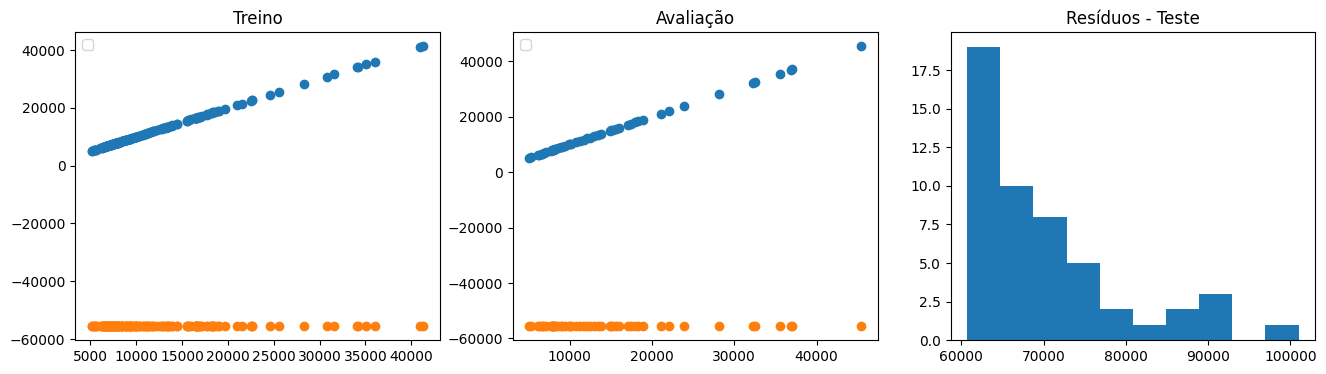


 AdaBoostRegressor() 

### Teste ###
RSME =  2695.98
R2 SCORE =  91.91


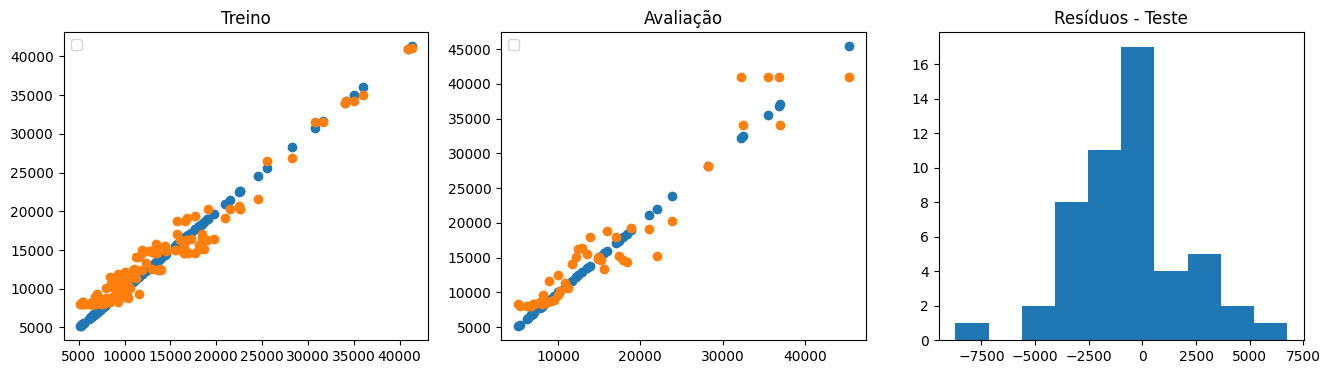


 GradientBoostingRegressor() 

### Teste ###
RSME =  2537.16
R2 SCORE =  92.84


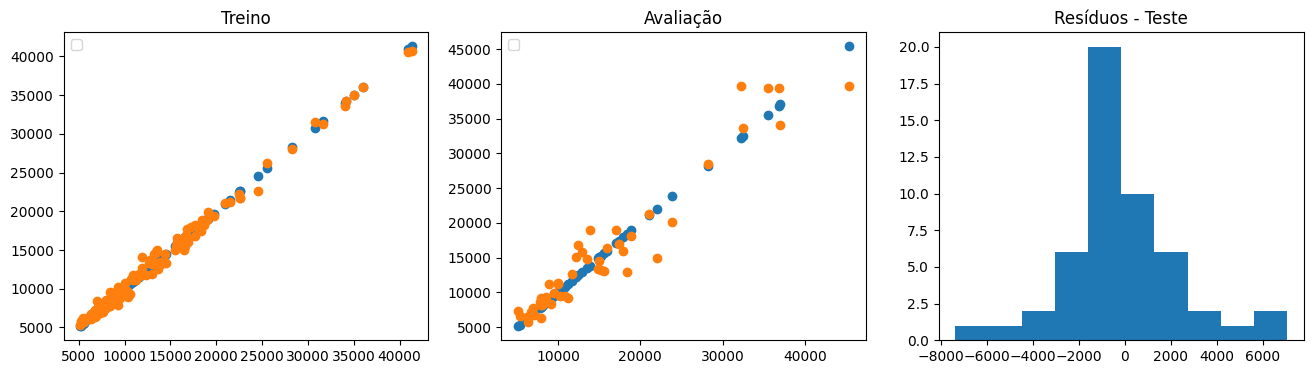

,ML,RSME,R2 SCORE
0,"(DecisionTreeRegressor(max_depth=10, max_featu...",2444.31,93.35
1,"(ExtraTreeRegressor(max_depth=10, random_state...",2450.81,93.32
13,([DecisionTreeRegressor(criterion='friedman_ms...,2537.16,92.84
12,"(DecisionTreeRegressor(max_depth=3, random_sta...",2695.98,91.91
10,MLPRegressor(solver='lbfgs'),2993.65,90.03
8,LinearRegression(),3070.69,89.51
2,DecisionTreeRegressor(max_depth=10),3089.00,89.39
7,KNeighborsRegressor(),5660.75,64.35
5,SVR(kernel='linear'),10597.34,-24.92
3,SVR(kernel='poly'),10651.42,-26.20


In [6]:
modelos = [RandomForestRegressor(max_depth=10, n_estimators=500), ExtraTreesRegressor(n_estimators=500, max_depth=10), DecisionTreeRegressor(max_depth=10),
           SVR(kernel='poly'), SVR(kernel='sigmoid'), SVR(kernel='linear'), SVR(), KNeighborsRegressor(n_neighbors=5), LinearRegression(), MLPRegressor(solver='adam'),
           MLPRegressor(solver='lbfgs'), MLPRegressor(solver='sgd'), AdaBoostRegressor(), GradientBoostingRegressor()]

lista = []

for modelo in modelos:
    modelo.fit(X_train,y_train)
    treino_predict = modelo.predict(X_train)
    predict = modelo.predict(X_test)
    print('\n',modelo,'\n')
    RSME = np.round(np.sqrt(mean_squared_error(y_test, predict)),2)
    R2 = np.round(r2_score(y_test, predict) * 100,2)

    lista.append((modelo,RSME,R2))

    print('### Teste ###')
    print('RSME = ',RSME)
    print('R2 SCORE = ',R2)

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plt.title('Treino')
    plt.legend(['Real','Previsto'])
    plt.scatter(y_train, y_train)
    plt.scatter(y_train, treino_predict)

    plt.subplot(1, 3, 2)
    plt.title('Avaliação')
    plt.legend(['Real','Previsto'])
    plt.scatter(y_test, y_test)
    plt.scatter(y_test, predict)

    plt.subplot(1, 3, 3)
    plt.title('Resíduos - Teste')
    plt.hist(y_test - predict)
    plt.show()

resumo = pd.DataFrame(lista,columns=['ML','RSME','R2 SCORE'])
resumo.sort_values('RSME')

### SALVANDO OS MODELOS DE MACHINE LEARNING E DE PRÉ-PROCESSAMENTO

In [7]:
def testar(folds):
    n_estimators = folds.suggest_int('n_estimators', 50,600)
    max_depth = folds.suggest_int('max_depth', 1,15)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(testar, n_trials=50)

best_params = study.best_params
best_model = RandomForestRegressor(**best_params)

best_model.fit(X_train, y_train)
print(best_model.score(X_train, y_train))

[I 2024-01-31 15:24:25,757] A new study created in memory with name: no-name-e2ca0e1e-3230-4360-9aea-4a54e2648fa0
[I 2024-01-31 15:24:27,275] Trial 0 finished with value: 0.8752749592644458 and parameters: {'n_estimators': 63, 'max_depth': 4}. Best is trial 0 with value: 0.8752749592644458.
[I 2024-01-31 15:24:28,985] Trial 1 finished with value: 0.878242991073843 and parameters: {'n_estimators': 481, 'max_depth': 5}. Best is trial 1 with value: 0.878242991073843.
[I 2024-01-31 15:24:30,082] Trial 2 finished with value: 0.6345030632223434 and parameters: {'n_estimators': 165, 'max_depth': 1}. Best is trial 1 with value: 0.878242991073843.
[I 2024-01-31 15:24:31,050] Trial 3 finished with value: 0.876832271113696 and parameters: {'n_estimators': 108, 'max_depth': 4}. Best is trial 1 with value: 0.878242991073843.
[I 2024-01-31 15:24:32,376] Trial 4 finished with value: 0.8757009229979354 and parameters: {'n_estimators': 546, 'max_depth': 12}. Best is trial 1 with value: 0.87824299107384

0.9846615217983165


In [8]:
import joblib

joblib.dump('BEST_MODEL','best_model.pkl')
joblib.dump(normalizador,'escala.joblib')
joblib.dump(numerador,'numeric.joblib')

['numeric.joblib']

### CARREGANDO OS MODELOS DE MACHINE LEARNING E DE PRÉ-PROCESSAMENTO

In [10]:
import joblib

modelo = joblib.load('best_model.pkl')
scala = joblib.load('escala.joblib')
numeric = joblib.load('numeric.joblib')